# HR-аналитика: смена работы специалистов по обработке данных

## Введение

В данном проекте проведено исследование набора данных о смене работы специалистов в области науки о данных. Целью проекта является анализ факторов, влияющих на решение специалистов покинуть свою текущую работу.

## Контекст

Компания, которая занимается большими данными и наукой о данных, проводит курсы и хочет нанять специалистов по обработке данных, успешно прошедших обучение.
 
Многие люди записываются на их обучение. Компания хочет знать, кто из этих кандидатов действительно хочет работать в компании после обучения. Это поможет сократить затрату ресурсов на поиск новых сотрудников. Также это поможет в категоризации кандидатов для подготовки оптимального плана обучения. 

Компания получает информацию о кандидатах в момент их регистрации на курс.

## Постановка задачи

Определить как различные факторы влияют на желание сменить работу.

## Данные
- Источник данных: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists
- Набор данных содержит информацию о 19158 специалистах, включая такие переменные, как:

enrollee_id: уникальный идентификатор кандидата;

city: код города;

city_development _index: индекс развития города; 

gender: Пол кандидата;

relevent_experience: релевантный опыт кандидата;

enrolled_university: тип текущего обучения, если имеется (маркер времени, которое кандидат тратит на учебу);

education_level: уровень образования;

major_discipline: основная дисциплина кандидата
 
experience: общий опыт кандидата в годах;

Company_size: количество сотрудников в компании текущего работодателя;

Company_type: тип текущего работодателя;

Last_new_job: разница в годах между предыдущим и текущим местом работы;

Training_hours: количество часов обучения;

Target: 0 – не готов менять работу, 1 – готов менять работу.

## Методы и инструменты

#### Методы анализа:
- тест Хи-квадрат, тест Фишера, коэффициент корреляции между категориальными переменными;
- визуализация данных;
- сводные таблицы.

#### Использованные библиотеки: 
Pandas, NumPy, Matplotlib, Seaborn, Phik, Re, Scipy, IPython.

## Процесс работы
1. Загрузка и предварительный анализ набора данных, включающий проверку на пропуски и аномалии.
2. Преобразование и очистка данных.
3. Анализ данных.

## Формулировка гипотез для статистических тестов:

* Нулевая гипотеза (H0): Нет статистически значимой связи между двумя переменными. То есть распределение одной переменной не зависит от другой.
* Альтернативная гипотеза (H1): Есть статистически значимая связь между двумя переменными. Это означает, что распределение одной переменной зависит от другой.

# Импортирование необходимых библиотек

In [2051]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import phik 
import re 
import scipy.stats as stats
from scipy.stats import chi2_contingency
from IPython.display import Markdown

# Настройка визуализации

In [2052]:
plt.style.use('dark_background')

# Чтение данных

In [2053]:
path = '/Users/user/Desktop/данные/aug_train.csv' 
df = pd.read_csv(path)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# Предварительный анализ и обработка данных
#### Есть ли какие-либо переменные, которые требуют очистки, замены значений, преобразования типов или разбиения на новые катогрии?

In [2054]:
# Проверка типов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [2055]:
# Проверка пропусков
df.isna().mean().sort_values(ascending=False) 

company_type              0.320493
company_size              0.309949
gender                    0.235306
major_discipline          0.146832
education_level           0.024011
last_new_job              0.022080
enrolled_university       0.020148
experience                0.003393
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
target                    0.000000
dtype: float64

Принимаем решение не обрабатывать пропуски, чтобы не искажать данные и не использовать значения с пропусками в дальнейшем анализе

In [2056]:
# Проверка уникальных значений и их количества
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [2057]:
# Проверка уникальных значений и их количества
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

Избавимся от излишней детализации и рассмотрим только наличие высшего или среднего образования.

In [2089]:
# Функция для разделения уровня образования на 2 группы
def edication_group(x):
    if x in ['Primary School', 'High School']:
        return 'School'
    if x in ['Graduate', 'Masters','Phd']:
        return 'Graduate'
    return x 

In [2059]:
# Применение функции к столбцу
df['education_level_group'] = df['education_level'].apply(edication_group)

In [2060]:
# Проверка уникальных значений и их количества
df['education_level_group'].value_counts()

Graduate    16373
School       2325
Name: education_level_group, dtype: int64

In [2061]:
# Проверка уникальных значений и их количества
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [2062]:
# Проверка уникальных значений и их количества
df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [2063]:
# Проверка уникальных значений и их количества
df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [2064]:
# Проверка уникальных значений и их числа
df['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [2065]:
# Очистка заменами и заполнением пропусков, смена типа
df['experience'] = df['experience'].replace('>20', '25').replace('<1', '0').fillna(-1).astype(int)

In [2066]:
# Количество уникальных значений столбца
df['experience'].value_counts().sort_values

<bound method Series.sort_values of  25    3286
 5     1430
 4     1403
 3     1354
 6     1216
 2     1127
 7     1028
 10     985
 9      980
 8      802
 15     686
 11     664
 14     586
 1      549
 0      522
 16     508
 12     494
 13     399
 17     342
 19     304
 18     280
 20     148
-1       65
Name: experience, dtype: int64>

In [2067]:
# Разбиение столбца с непрерывными значениями на равные отрезки
df['experience_group'] = pd.cut(df['experience'], [-0.5, 5.0, 10.0, 15.0, 25.0])

In [2068]:
# Количество уникальных значений столбца
df['experience_group'].value_counts().sort_values

<bound method Series.sort_values of (-0.5, 5.0]     6385
(5.0, 10.0]     5011
(15.0, 25.0]    4868
(10.0, 15.0]    2829
Name: experience_group, dtype: int64>

In [2069]:
# Проверка уникальных значений и их количества
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [2070]:
df['company_size'] = df['company_size'].replace('10/49', '10-49')

In [2071]:
# Проверка правильности выполненных действий
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [2072]:
# Проверка уникальных значений и их количества
df['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [2073]:
# Очистка заменой, преобразование типа
df['last_new_job'] = df['last_new_job'].replace('never', 0).astype('category') 

In [2074]:
# Проверка правильности действий
df['last_new_job'].value_counts()

1     8040
>4    3290
2     2900
0     2452
4     1029
3     1024
Name: last_new_job, dtype: int64

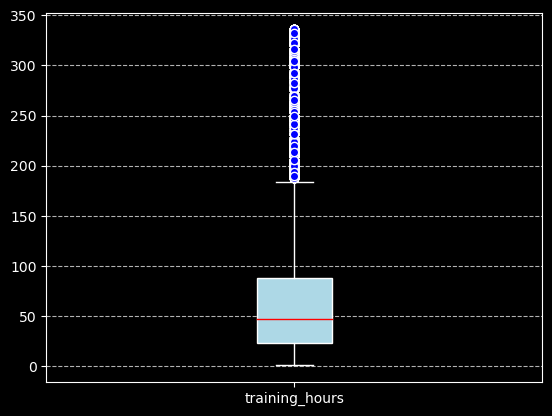

In [2075]:
# Построение Box plot
df['training_hours'].plot(kind='box', 
                                         patch_artist=True, 
                                         medianprops=dict(color='red', linewidth=1),  # Яркая медиана
                                         boxprops=dict(facecolor='lightblue', edgecolor='white'),  # Цвет коробки с белым ободком
                                         whiskerprops=dict(color='white'),  # Цвет усов
                                         capprops=dict(color='white'),  # Цвет капелек
                                         flierprops=dict(markerfacecolor='blue', marker='o', markeredgecolor='white'))  # Цвет выбросов

# Добавление сетки
plt.grid(axis='y', linestyle='--', alpha=0.7)

Наличие выбросов и асимметрии указывает на значительный дисбаланс между выборками. Чтобы повысить статистическую значимость последующего анализа, разделим значения на несколько категорий.

In [2076]:
# Разбиение столбца с непрерывными значениями на равные по количеству людей категории
df['training_hours_group'] = pd.qcut(df['training_hours'], 4, duplicates='drop')

In [2077]:
# Проверка частоты в каждой группе
df.groupby(['training_hours_group'])['target'].agg(['count'])

,count
training_hours_group,
"(0.999, 23.0]",4923
"(23.0, 47.0]",4706
"(47.0, 88.0]",4748
"(88.0, 336.0]",4781


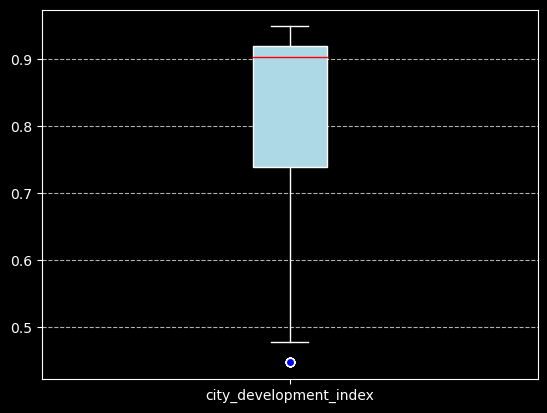

In [2078]:
# Установка стиля seaborn для более приятного оформления
df['city_development_index'].plot(kind='box', 
                                         patch_artist=True, 
                                         medianprops=dict(color='red', linewidth=1),  # Яркая медиана
                                         boxprops=dict(facecolor='lightblue', edgecolor='white'),  # Цвет коробки с белым ободком
                                         whiskerprops=dict(color='white'),  # Цвет усов
                                         capprops=dict(color='white'),  # Цвет капелек
                                         flierprops=dict(markerfacecolor='blue', marker='o', markeredgecolor='white'))  # Цвет выбросов

# Добавление сетки
plt.grid(axis='y', linestyle='--', alpha=0.7)

Наличие выбросов и асимметрии указывает на значительный дисбаланс между выборками. Чтобы повысить статистическую значимость последующего анализа, разделим значения на несколько категорий.

In [2079]:
df['city_development_index_group'] = pd.qcut(df['city_development_index'], 7, duplicates = 'drop')

In [2080]:
# Проверка частоты в каждой категории
df['city_development_index_group'].value_counts(ascending=False)

(0.91, 0.92]      5491
(0.447, 0.624]    3427
(0.887, 0.91]     2893
(0.766, 0.887]    2725
(0.92, 0.949]     2537
(0.624, 0.766]    2085
Name: city_development_index_group, dtype: int64

In [2081]:
# Группировка по городу и вычисление агрегатных функций
agg_data = df.groupby('city')['target'].agg(['count', 'sum', 'mean'])

# Выбор топ-10 городов с наименьшим количеством
agg_data.nsmallest(15, 'count')

,count,sum,mean
city,,,
city_140,1,0.0,0.000000
city_171,1,1.0,1.000000
city_111,3,0.0,0.000000
city_121,3,1.0,0.333333
city_129,3,0.0,0.000000
city_166,4,1.0,0.250000
city_18,4,1.0,0.250000
city_25,4,2.0,0.500000
city_31,4,1.0,0.250000


В категориях наблюдается очень низкая частота (менее 30 человек). Не будем рассматривать влияние данной переменной на желание сменить работу, поскольку не сможем получить статистически значимого результата.

In [2082]:
# Функция для построения сводной таблицы, гистограммы и проведения статистического теста
def pvt_plt_stest(x):
    y = 'target'
    display(Markdown(f"## Влияние переменной  **{x}** на желание сменить работу."))
    # Построение сводной таблицы
    result = df.groupby(x)[y].agg(['count','sum','mean']).sort_values('mean', ascending=False)
    # Переименование стобцов таблицы
    result = result.rename(columns={'sum': 'absolute value', 'mean': 'proportion'})
    # Построение гистограммы
    ax = df.groupby(x)[y].agg(['mean']).sort_values('mean', ascending=False).plot(kind='bar') 
    ax.legend().set_visible(False) # удаление легенды
    # Добавление подписи графика сбоку
    plt.title('Доля желающих сменить работу в каждой категории переменной ' + x)
    plt.ylabel('proportion')
    # Вывод результатов
    display(result)
    plt.show()
    text_box = widgets.Textarea(layout=widgets.Layout(width='100%', height='60px')) # текстовая ячейка
    display(Markdown(f"#### Является ли данный результат статистически значимым?"))
    if len(df[x].unique()) == 2:
        # Создание котегориальной таблицы
        contingency_table =  pd.crosstab(df[x], df[y])
        # Тест Фишера
        _, p_value = stats.fisher_exact(contingency_table)
    else:
        # Создание таблицы сопряженности
        contingency_table = pd.crosstab(df[x], df[y], margins=True, margins_name='result')
        # Теста Хи-квадрат
        _, p_value, _, _ = stats.chi2_contingency(contingency_table)
        # Вывод результатов
    display(Markdown(f"##### p-значение: **{round(p_value,2)}**\n\n #### Статистическая значимость:"))
    if p_value < 0.05:
        display(Markdown(f"##### Поскольку p_value меньше 0.05, можно утверждать, что между " + x + " и " + y + " существует статистически значимая связь"))
    else: 
         display(Markdown(f"##### Поскольку p_value больше 0.05, можно утверждать, что между " + x + " и " + y + " не существует статистически значимая связь"))
    return text_box    

# Влияние одной переменной на желание сменить работу. 

Чтобы выявить закономерности, мы сначала определим корреляции признаков.
Положительные корреляции между переменными отображаются красным цветом, 
отрицательные корреляции — синим, 
а отсутствие корреляции — белым на кластерной тепловой карте ниже.

In [2083]:
# Переводим все переменные в категориальные и записываем в новый DataFrame
df_c = pd.DataFrame()
for i in df.columns:
    df_c[i] = df[i].copy().astype('category')

In [2084]:
# Удаление столбцов
df_c = df_c.drop(columns=['enrollee_id', 'city_development_index', 'training_hours', 'city', 'education_level', 'experience'])

<Axes: >

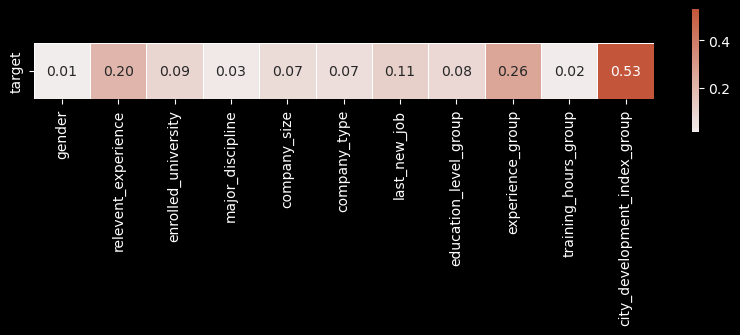

In [2085]:
# Рассчет матрицы корреляции с использованием phik
correlation_matrix = df_c.phik_matrix()

# Получаем коэффициенты Phik для выбранных переменных по отношению к 'target'
correlation_matrix =  correlation_matrix.loc[['target']]
correlation_matrix = correlation_matrix.drop(columns='target')

# Настройка цветовой карты
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Настройка тепловой карты
plt.figure(figsize=(10, 2))
sns.heatmap(correlation_matrix, 
            annot=np.round(correlation_matrix, 2),  # Округление значений
            fmt=".2f",  # Формат отображения
            cmap=cmap, 
            center=0, 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": .8}, 
            xticklabels=correlation_matrix.columns, 
            yticklabels=correlation_matrix.index,
            cbar=True)

Переменная target слабо коррелирует со всеми переменными, кроме переменной city_development_index_group, с которой наблюается сильная корреляция. 

In [2086]:
# Удаление столбцов
df_tempo =  df.drop(columns=['enrollee_id', 'city_development_index', 'training_hours', 'city', 'education_level', 'experience', 'target'])

In [2087]:
text_boxes = []  # Список для хранения текстовых полей

## Влияние переменной  **gender** на желание сменить работу.

,count,absolute value,proportion
gender,,,
Female,1238,326.0,0.263328
Other,191,50.0,0.261780
Male,13221,3012.0,0.227819


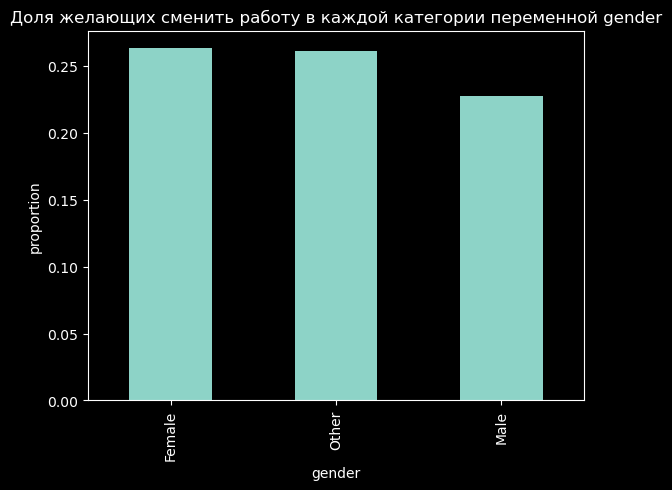

#### Является ли данный результат статистически значимым?

##### p-значение: **0.17**

 #### Статистическая значимость:

##### Поскольку p_value больше 0.05, можно утверждать, что между gender и target не существует статистически значимая связь

## Влияние переменной  **relevent_experience** на желание сменить работу.

,count,absolute value,proportion
relevent_experience,,,
No relevent experience,5366,1816.0,0.338427
Has relevent experience,13792,2961.0,0.214690


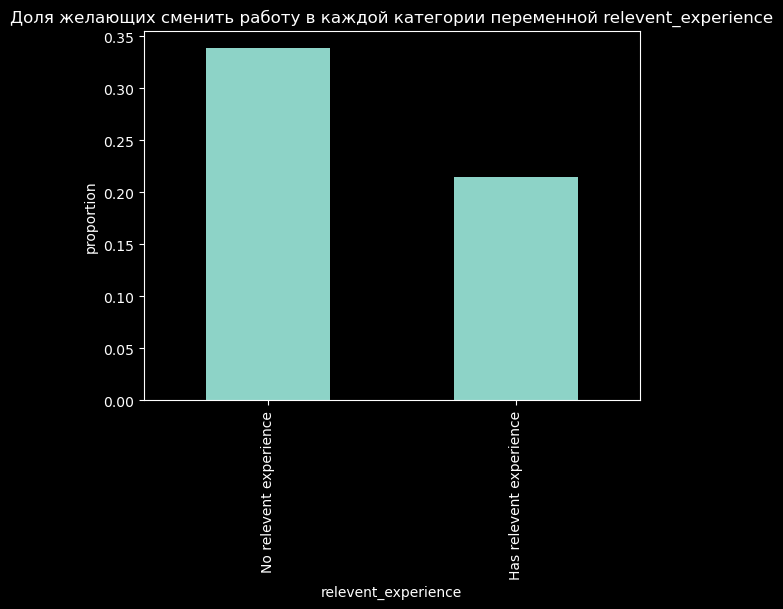

#### Является ли данный результат статистически значимым?

##### p-значение: **0.0**

 #### Статистическая значимость:

##### Поскольку p_value меньше 0.05, можно утверждать, что между relevent_experience и target существует статистически значимая связь

## Влияние переменной  **enrolled_university** на желание сменить работу.

,count,absolute value,proportion
enrolled_university,,,
Full time course,3757,1431.0,0.380889
Part time course,1198,302.0,0.252087
no_enrollment,13817,2921.0,0.211406


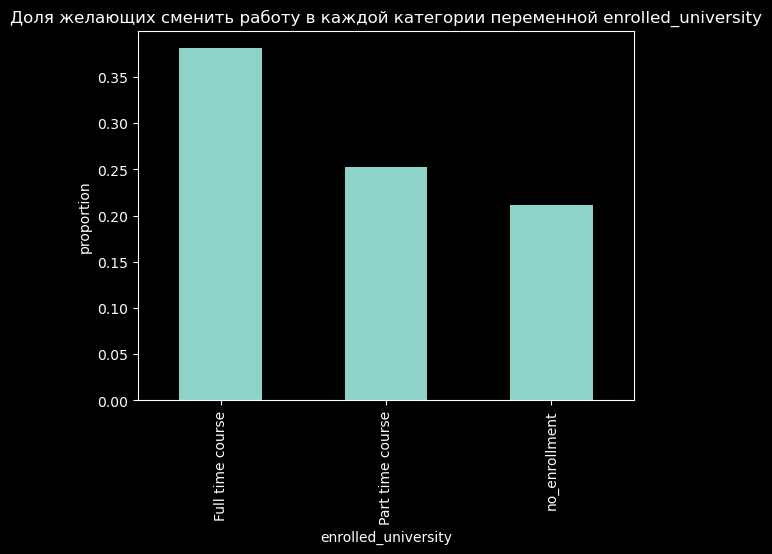

#### Является ли данный результат статистически значимым?

##### p-значение: **0.0**

 #### Статистическая значимость:

##### Поскольку p_value меньше 0.05, можно утверждать, что между enrolled_university и target существует статистически значимая связь

## Влияние переменной  **major_discipline** на желание сменить работу.

,count,absolute value,proportion
major_discipline,,,
Other,381,102.0,0.267717
Business Degree,327,86.0,0.262997
STEM,14492,3791.0,0.261593
No Major,223,55.0,0.246637
Humanities,669,141.0,0.210762
Arts,253,53.0,0.209486


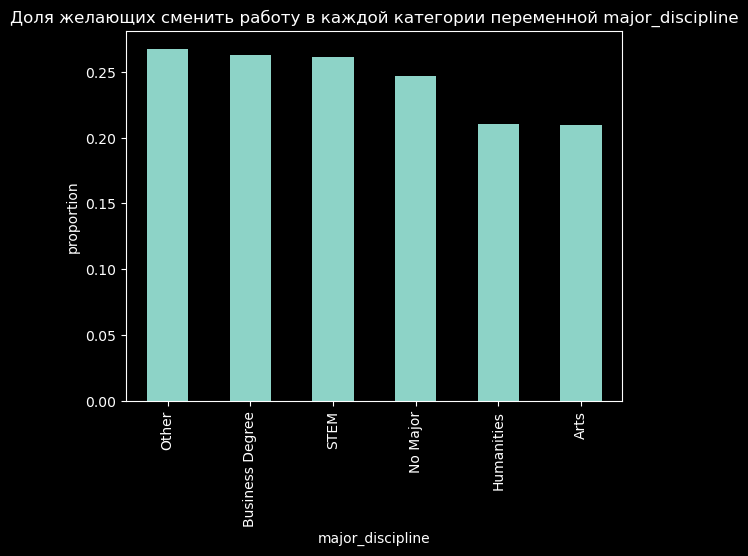

#### Является ли данный результат статистически значимым?

##### p-значение: **0.43**

 #### Статистическая значимость:

##### Поскольку p_value больше 0.05, можно утверждать, что между major_discipline и target не существует статистически значимая связь

## Влияние переменной  **company_size** на желание сменить работу.

,count,absolute value,proportion
company_size,,,
10-49,1471,344.0,0.233855
10000+,2019,385.0,0.190688
5000-9999,563,102.0,0.181172
50-99,3083,545.0,0.176776
500-999,877,152.0,0.173318
<10,1308,224.0,0.171254
100-500,2571,415.0,0.161416
1000-4999,1328,200.0,0.150602


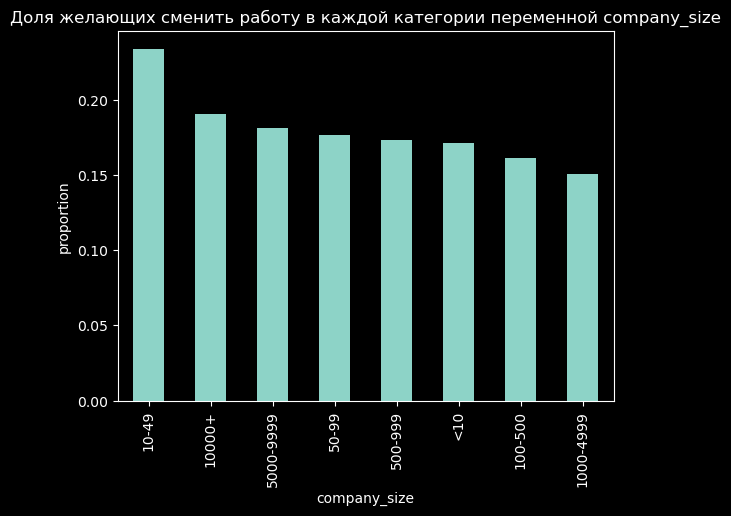

#### Является ли данный результат статистически значимым?

##### p-значение: **0.0**

 #### Статистическая значимость:

##### Поскольку p_value меньше 0.05, можно утверждать, что между company_size и target существует статистически значимая связь

## Влияние переменной  **company_type** на желание сменить работу.

,count,absolute value,proportion
company_type,,,
Other,121,29.0,0.239669
Early Stage Startup,603,142.0,0.235489
Public Sector,955,210.0,0.219895
NGO,521,97.0,0.186180
Pvt Ltd,9817,1775.0,0.180809
Funded Startup,1001,140.0,0.139860


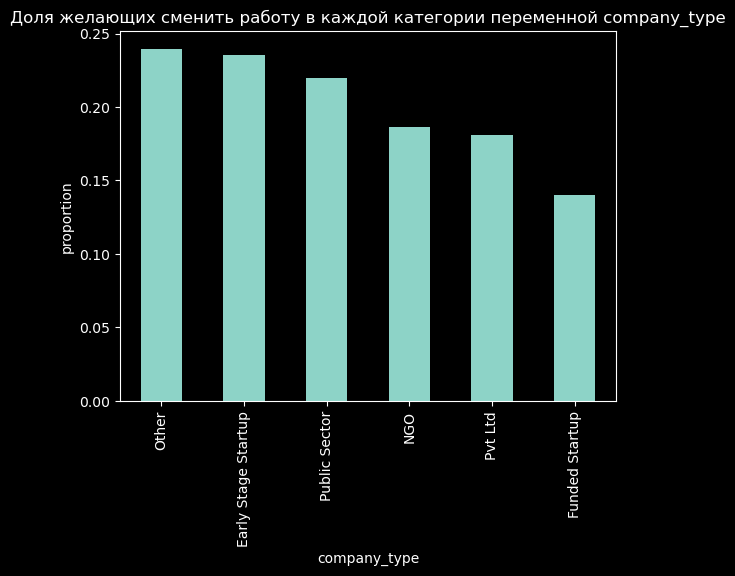

#### Является ли данный результат статистически значимым?

##### p-значение: **0.0**

 #### Статистическая значимость:

##### Поскольку p_value меньше 0.05, можно утверждать, что между company_type и target существует статистически значимая связь

## Влияние переменной  **last_new_job** на желание сменить работу.

,count,absolute value,proportion
last_new_job,,,
0,2452,739.0,0.301387
1,8040,2125.0,0.264303
2,2900,700.0,0.241379
3,1024,231.0,0.225586
4,1029,228.0,0.221574
>4,3290,600.0,0.182371


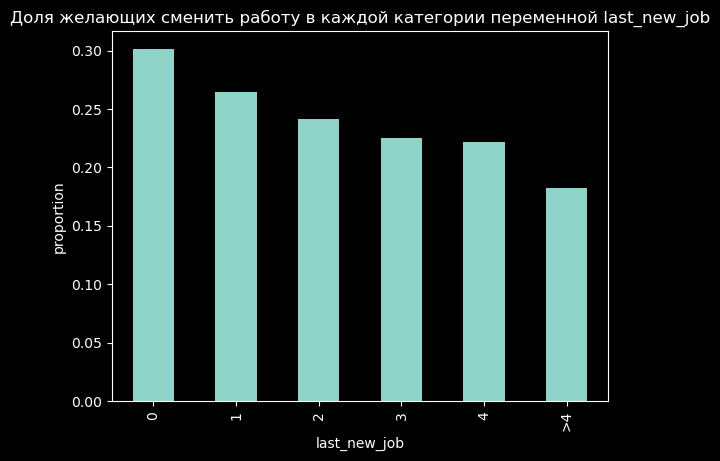

#### Является ли данный результат статистически значимым?

##### p-значение: **0.0**

 #### Статистическая значимость:

##### Поскольку p_value меньше 0.05, можно утверждать, что между last_new_job и target существует статистически значимая связь

## Влияние переменной  **education_level_group** на желание сменить работу.

,count,absolute value,proportion
education_level_group,,,
Graduate,16373,4238.0,0.258841
School,2325,435.0,0.187097


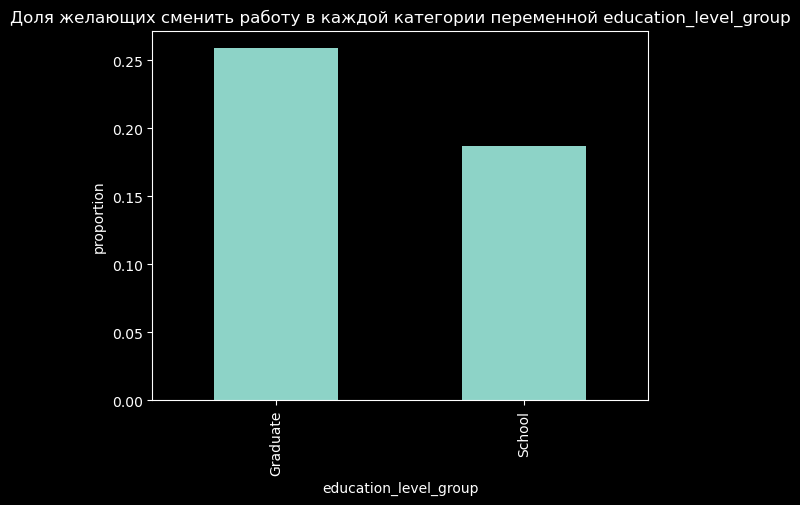

#### Является ли данный результат статистически значимым?

##### p-значение: **0.0**

 #### Статистическая значимость:

##### Поскольку p_value меньше 0.05, можно утверждать, что между education_level_group и target существует статистически значимая связь

## Влияние переменной  **experience_group** на желание сменить работу.

,count,absolute value,proportion
experience_group,,,
"(-0.5, 5.0]",6385,2191.0,0.343148
"(5.0, 10.0]",5011,1261.0,0.251646
"(10.0, 15.0]",2829,541.0,0.191234
"(15.0, 25.0]",4868,761.0,0.156327


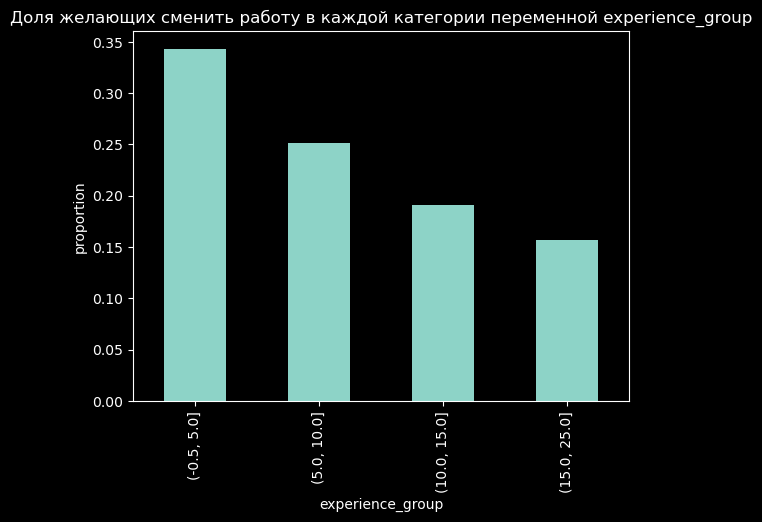

#### Является ли данный результат статистически значимым?

##### p-значение: **0.0**

 #### Статистическая значимость:

##### Поскольку p_value меньше 0.05, можно утверждать, что между experience_group и target существует статистически значимая связь

## Влияние переменной  **training_hours_group** на желание сменить работу.

,count,absolute value,proportion
training_hours_group,,,
"(23.0, 47.0]",4706,1212.0,0.257544
"(47.0, 88.0]",4748,1199.0,0.252527
"(0.999, 23.0]",4923,1233.0,0.250457
"(88.0, 336.0]",4781,1133.0,0.236980


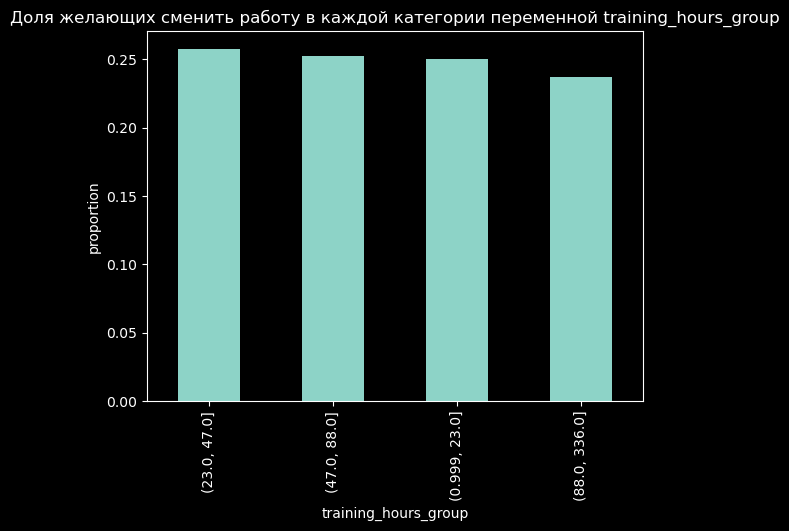

#### Является ли данный результат статистически значимым?

##### p-значение: **0.66**

 #### Статистическая значимость:

##### Поскольку p_value больше 0.05, можно утверждать, что между training_hours_group и target не существует статистически значимая связь

## Влияние переменной  **city_development_index_group** на желание сменить работу.

,count,absolute value,proportion
city_development_index_group,,,
"(0.447, 0.624]",3427,2017.0,0.588561
"(0.624, 0.766]",2085,560.0,0.268585
"(0.91, 0.92]",5491,1161.0,0.211437
"(0.766, 0.887]",2725,447.0,0.164037
"(0.887, 0.91]",2893,327.0,0.113031
"(0.92, 0.949]",2537,265.0,0.104454


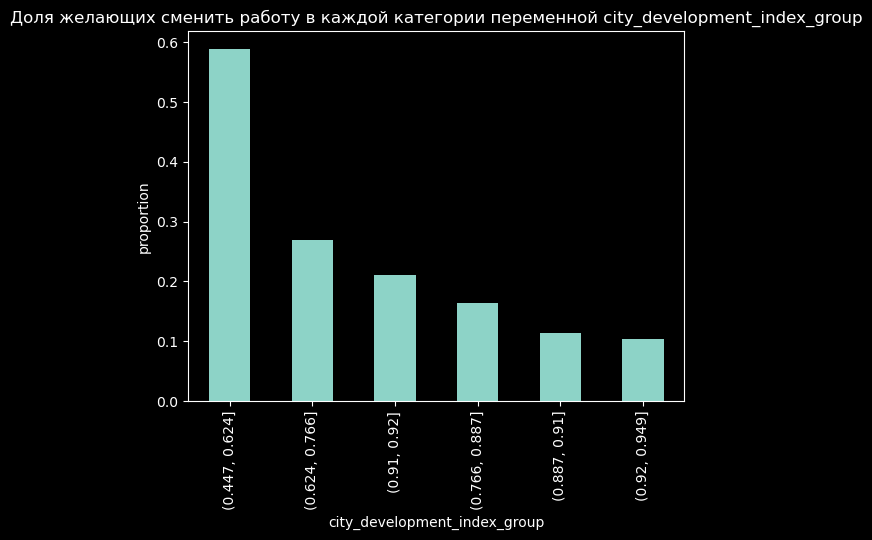

#### Является ли данный результат статистически значимым?

##### p-значение: **0.0**

 #### Статистическая значимость:

##### Поскольку p_value меньше 0.05, можно утверждать, что между city_development_index_group и target существует статистически значимая связь

In [2088]:
# Проведение статистического теста 
for attribute in df_tempo.columns:
    pvt_plt_stest(attribute)

## Вывод по гистограммам: 

Ни на одном из графиков не наблюдается значимая зависимость между переменными, кроме гистограммы 
для переменных city_development_index_group и target. На последней наблюдается обратная линейная зависимость: чем выше уровень развития города, тем меньше желание сменить работу. Максимальная разница между долями желающих сменить работу в категориях составляет примерно 48.4%.

# Общий вывод:

- Не оказывают влияние на желание сменить работу переменные: гендер, главные дисциплины, часы тренинга.
- Существенно влияет на желание сменить работу оказывают переменные: индекс развития города.
- Несущественное влияние оказывают переменные: уровень образования, опыт, релевантный опыт, текущая учебная занятость, размер компании, тип компании, перерыв между прошлым и текущим местом работы. 

